## Kelompok 7
### Praproses Data Masalah Kesejahteraan Sosial di Jawa Barat



Andhika Dzikri Fadillah (NIM 2009377) <br>
Andum Pangestu (NIM 2003210) <br>
Azzam Muhammad Naufal (NIM 2007763) <br>
Mohammad Ray Mosaid (NIM 2004942) <br>



In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Sumber Data : https://opendata.jabarprov.go.id/id/dataset/jumlah-penyandang-masalah-kesejahteraan-sosial-pmks-berdasarkan-jenis-masalah-di-jawa-barat

In [2]:
df = pd.read_csv("dinsos-od_15575_jml_penyandang_masalah_ksjhtrn_ssl_pmks__kabupatenkota_data.csv")

In [3]:
df.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,masalah_kesejahteraan_sosial,jumlah,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,BALITA TERLANTAR,9180.0,ORANG,2014
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,ANAK TERLANTAR,69990.0,ORANG,2014
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,ANAK NAKAL (ABH),8860.0,ORANG,2014
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,ANAK JALANAN,2080.0,ORANG,2014
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,WANITA RAWAN SOSIAL EKONOMI (JIWA),85370.0,ORANG,2014


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4511 entries, 0 to 4510
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            4511 non-null   int64  
 1   kode_provinsi                 4511 non-null   int64  
 2   nama_provinsi                 4511 non-null   object 
 3   kode_kabupaten_kota           4511 non-null   int64  
 4   nama_kabupaten_kota           4511 non-null   object 
 5   masalah_kesejahteraan_sosial  4511 non-null   object 
 6   jumlah                        4505 non-null   float64
 7   satuan                        4511 non-null   object 
 8   tahun                         4511 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 317.3+ KB


## Penghapusan Atribut 

## ==================================================

Melakukan pengecekan apakah atribut tersebut merepresentasikan kabupaten/kota lain selain kabupaten/kota dengan kode provinsi 32 dan nama provinsi lain selain jawa barat. selain itu, dilakukan juga pengecekan apakah ada satuan lain yang digunakan selain "orang"

In [5]:
df[df.kode_provinsi != 32].count()

id                              0
kode_provinsi                   0
nama_provinsi                   0
kode_kabupaten_kota             0
nama_kabupaten_kota             0
masalah_kesejahteraan_sosial    0
jumlah                          0
satuan                          0
tahun                           0
dtype: int64

In [6]:
df[df.nama_provinsi != "JAWA BARAT"].count()

id                              0
kode_provinsi                   0
nama_provinsi                   0
kode_kabupaten_kota             0
nama_kabupaten_kota             0
masalah_kesejahteraan_sosial    0
jumlah                          0
satuan                          0
tahun                           0
dtype: int64

In [7]:
df[df.satuan != "ORANG"].count()

id                              0
kode_provinsi                   0
nama_provinsi                   0
kode_kabupaten_kota             0
nama_kabupaten_kota             0
masalah_kesejahteraan_sosial    0
jumlah                          0
satuan                          0
tahun                           0
dtype: int64

Karena semua data ini merupakan data setiap kabupaten di Jawa Barat, maka atribut kode provinsi, nama provinsi dan satuan dilakukan penghapusan karena ketiga atribut tersebut tidak diperlukan

In [8]:
df = df.drop(['nama_provinsi','kode_provinsi', 'satuan', 'id'],axis=1)

Melakukan pengecekan apakah atribut nama kabupaten/kota sama sama dengan kode kabupaten/kota

In [9]:
df[(df.nama_kabupaten_kota != "KABUPATEN BOGOR" ) & (df.kode_kabupaten_kota == 3201)]

,kode_kabupaten_kota,nama_kabupaten_kota,masalah_kesejahteraan_sosial,jumlah,tahun
0,3201,KABUPATEN BOGOR,BALITA TERLANTAR,9180.0,2014
1,3201,KABUPATEN BOGOR,ANAK TERLANTAR,69990.0,2014
2,3201,KABUPATEN BOGOR,ANAK NAKAL (ABH),8860.0,2014
3,3201,KABUPATEN BOGOR,ANAK JALANAN,2080.0,2014
4,3201,KABUPATEN BOGOR,WANITA RAWAN SOSIAL EKONOMI (JIWA),85370.0,2014
5,3201,KABUPATEN BOGOR,KORBAN TINDAK KEKERSAN,20.0,2014
6,3201,KABUPATEN BOGOR,LANJUT USIA TERLANTAR,128780.0,2014
7,3201,KABUPATEN BOGOR,PENYANDANG CACAT,73580.0,2014
8,3201,KABUPATEN BOGOR,TUNA SUSILA,8370.0,2014
9,3201,KABUPATEN BOGOR,PENGEMIS,3840.0,2014


Setelah dilakukan pengecekan, ternyata terdapat perbedaan, yaitu terdapat nama kabupaten/kota yang dikahiri dengan satu karakter spasi ' ' dan ada yang tidak. oleh karena itu perlu dilakukan pemiliihan satu atribut yang valid

In [10]:
df = df.drop(['nama_kabupaten_kota'],axis=1)

Karena atribut yang valid adalah atribut kode kabupaten/kota, maka dilakukan penghapusan atribut nama kabupaten/kota. Dengan demikian sebuah kota/kabupaten akan direpresentasikan oleh kode kabupaten kota.

Hasil setelah dilakukan penghapusan beberapa atribut

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4511 entries, 0 to 4510
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   kode_kabupaten_kota           4511 non-null   int64  
 1   masalah_kesejahteraan_sosial  4511 non-null   object 
 2   jumlah                        4505 non-null   float64
 3   tahun                         4511 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 141.1+ KB


## ==================================================

## Penanganan Nilai yang Kurang Jelas

## ==================================================

Karena Atribut masalah_kesejahteraan_sosial yang bernilai "lain-lain" itu tidak jelas dan tidak berada di semua kabupaten/kota di data, maka dilakukan penghapusan data atribut masalah_kesejahteraan_sosial yang memiliki nilai "LAIN-LAIN"

In [12]:
df[df.masalah_kesejahteraan_sosial == "LAIN LAIN"]

,kode_kabupaten_kota,masalah_kesejahteraan_sosial,jumlah,tahun
3079,3201,LAIN LAIN,0.0,2019
3106,3202,LAIN LAIN,0.0,2019
3133,3203,LAIN LAIN,0.0,2019
3160,3204,LAIN LAIN,0.0,2019
3187,3205,LAIN LAIN,0.0,2019
3214,3206,LAIN LAIN,0.0,2019
3241,3207,LAIN LAIN,0.0,2019
3268,3208,LAIN LAIN,0.0,2019
3295,3209,LAIN LAIN,0.0,2019
3322,3210,LAIN LAIN,0.0,2019


In [13]:
df.drop(df[df.masalah_kesejahteraan_sosial == "LAIN LAIN"].index, inplace = True)

### Penanganan Nilai Null

In [14]:
df.isnull().sum()

kode_kabupaten_kota             0
masalah_kesejahteraan_sosial    0
jumlah                          6
tahun                           0
dtype: int64

In [15]:
data_kosong = pd.isnull(df["jumlah"])
df[data_kosong]

,kode_kabupaten_kota,masalah_kesejahteraan_sosial,jumlah,tahun
3948,3207,ANAK GELANDANGAN,NaN,2020
3963,3207,PEKERJA MIGRAN BERMASALAH SOSIAL,NaN,2020
3965,3207,KORBAN BENCANA SOSIAL,NaN,2020
4218,3217,ANAK GELANDANGAN,NaN,2020
4219,3217,ANAK KORBAN TINDAK KEKERASAN,NaN,2020
4227,3217,KELOMPOK MINORITAS (WARIA),NaN,2020


Setelah ditelusuri, ternyata terdapat 6 data null pada atribut jumlah. oleh karena itu, dilakukan penangan dengan mengisi nilai tersebut dengan nol

In [16]:
df["jumlah"].fillna(value = 0, inplace=True)

In [17]:
df["jumlah"] = df["jumlah"].astype("int64")

Pengisian nilai atribut jumlah yang bernilai 0 dengan rata-rata yang disesuaikan dengan kabupaten/kota dan jenis masalahnya

In [18]:
df.jumlah = df.apply(lambda row: df[(df.masalah_kesejahteraan_sosial == row.masalah_kesejahteraan_sosial) & (df.kode_kabupaten_kota == row.kode_kabupaten_kota)].jumlah.mean() if (row.jumlah == 0) else row.jumlah, axis=1)

Hasil setelah dilakukan pengisian nilai

In [19]:
df[df.jumlah == 0].count()

kode_kabupaten_kota             258
masalah_kesejahteraan_sosial    258
jumlah                          258
tahun                           258
dtype: int64

In [20]:
df.isnull().sum()

kode_kabupaten_kota             0
masalah_kesejahteraan_sosial    0
jumlah                          0
tahun                           0
dtype: int64

Setelah dilakukan pengisian, masih terdapat sekitar 5% dari total data atribut jumlah yang bernilai 0 

In [21]:
df[df.jumlah == 0]

,kode_kabupaten_kota,masalah_kesejahteraan_sosial,jumlah,tahun
16,3201,KOMUNITAS ADAT TERPENCIL,0.0,2014
112,3206,ANAK NAKAL (ABH),0.0,2014
114,3206,WANITA RAWAN SOSIAL EKONOMI (JIWA),0.0,2014
159,3208,KORBAN TINDAK KEKERSAN,0.0,2014
256,3212,KOMUNITAS ADAT TERPENCIL,0.0,2014
...,...,...,...,...
4416,3276,KELOMPOK MINORITAS (WARIA),0.0,2020
4428,3276,KOMUNITAS ADAT TERPENCIL,0.0,2020
4455,3277,KOMUNITAS ADAT TERPENCIL,0.0,2020
4505,3279,KORBAN BENCANA SOSIAL,0.0,2020


In [22]:
df[(df.kode_kabupaten_kota == 3201) & (df.masalah_kesejahteraan_sosial == "KOMUNITAS ADAT TERPENCIL")]

,kode_kabupaten_kota,masalah_kesejahteraan_sosial,jumlah,tahun
16,3201,KOMUNITAS ADAT TERPENCIL,0.0,2014
573,3201,KOMUNITAS ADAT TERPENCIL,0.0,2015
1130,3201,KOMUNITAS ADAT TERPENCIL,0.0,2016
1696,3201,KOMUNITAS ADAT TERPENCIL,0.0,2017
2387,3201,KOMUNITAS ADAT TERPENCIL,0.0,2018
3078,3201,KOMUNITAS ADAT TERPENCIL,0.0,2019
3807,3201,KOMUNITAS ADAT TERPENCIL,0.0,2020


In [23]:
df[(df.kode_kabupaten_kota == 3276) & (df.masalah_kesejahteraan_sosial == "KELOMPOK MINORITAS (WARIA)")]

,kode_kabupaten_kota,masalah_kesejahteraan_sosial,jumlah,tahun
2282,3276,KELOMPOK MINORITAS (WARIA),0.0,2017
2973,3276,KELOMPOK MINORITAS (WARIA),0.0,2018
3687,3276,KELOMPOK MINORITAS (WARIA),0.0,2019
4416,3276,KELOMPOK MINORITAS (WARIA),0.0,2020


Ternyata setelah ditelusuri, nilai 0 tersebut dihasilkan karena semua nilai pada atribut jumlah sesuai dengan masalah kesejahterannya tersebut bernilai 0. Dengan demikian, dilakukan penghapusan karena hal tersebut tidak diperlukan.

In [24]:
df.drop(df[(df.jumlah == 0)].index, inplace = True)

Hasil setelah dilakukan penanganan

In [25]:
df[df.jumlah == 0].count()

kode_kabupaten_kota             0
masalah_kesejahteraan_sosial    0
jumlah                          0
tahun                           0
dtype: int64

## ==================================================

## Penanganan Nilai Ekstrem

## ==================================================

<AxesSubplot:xlabel='jumlah'>

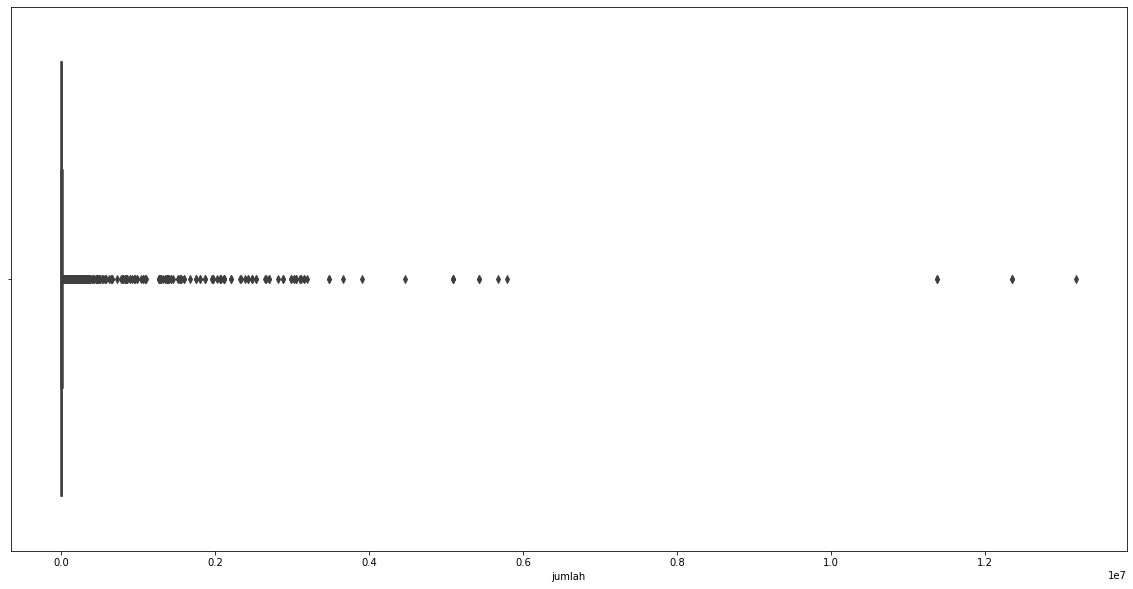

In [26]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(ax=ax, x="jumlah",data=df)

Karena ada beberapa nilai dari atribut jumlah yang terlalu ekstrem, maka dilakukan penghapusan pada data ekstrem tersebut untuk menyeimbangkan perseberan data

In [27]:
df.drop(df[(df.jumlah > 0.35*1e7)].index, inplace = True)

Hasil setelah dilakukan penghapusan

<AxesSubplot:xlabel='jumlah'>

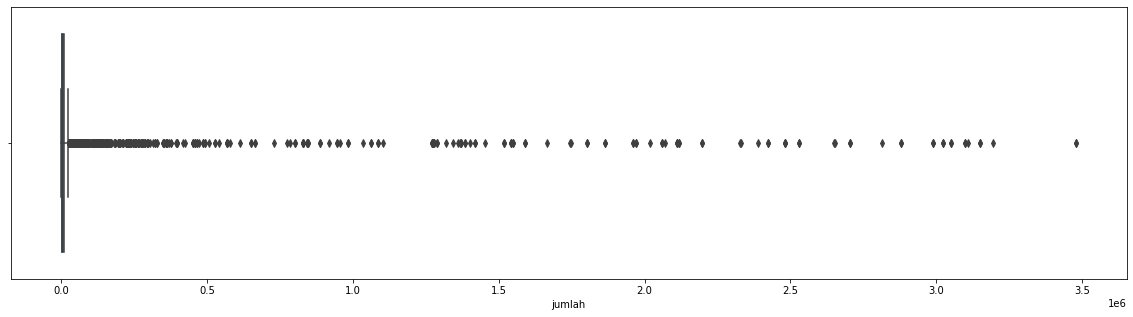

In [28]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(ax=ax, x="jumlah",data=df)

## ==================================================

## ==================================================

### Jumlah Kemunculan Kabupaten/Kota

<AxesSubplot:xlabel='kode_kabupaten_kota', ylabel='count'>

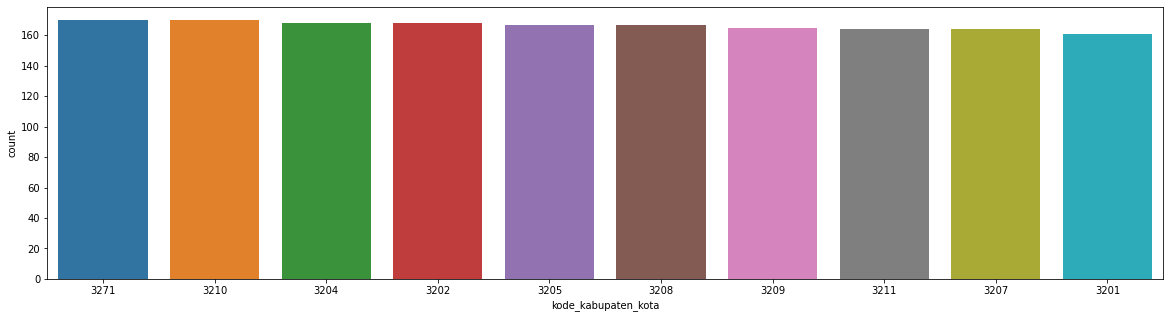

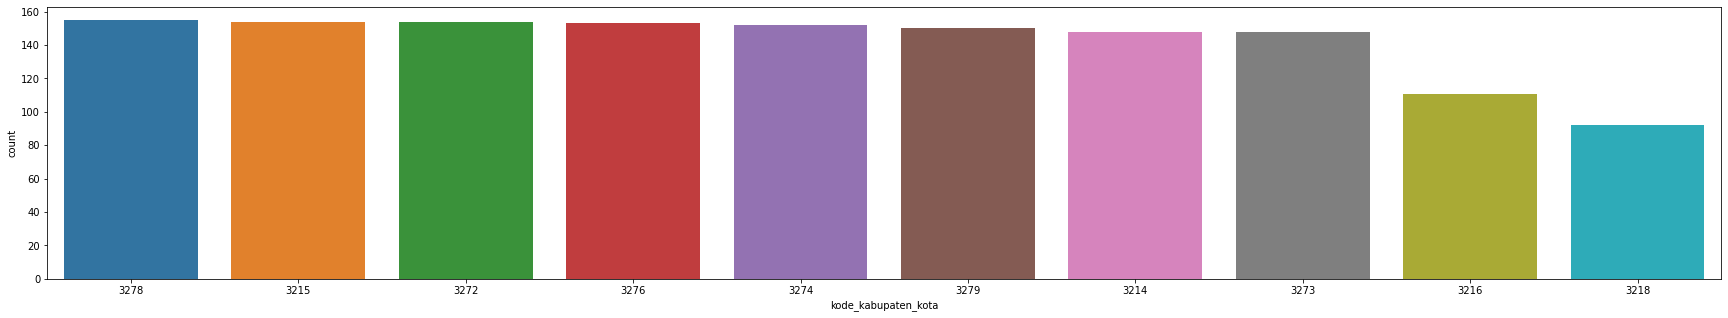

In [29]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(ax=ax, x="kode_kabupaten_kota", data=df, order=df.kode_kabupaten_kota.value_counts().iloc[:10].index)

fig, ax = plt.subplots(figsize=(30, 5))
sns.countplot(ax=ax, x="kode_kabupaten_kota", data=df, order=df.kode_kabupaten_kota.value_counts().iloc[-10:].index)

Berdasarkan diagram tersebut, Kota Bogor(3271) dan Kabupaten Majalengka (3210) merupakan kota yang memiliki kemunculan masalah kesejahteraan sosial terbanyak di jawa barat dari tahun 2014 sampai tahun 2020. Dalam rentang 7 tahun, kedua kota tersebut memiliki kemunculan masalah kesejahteraan sosial lebih dari 160 kasus. Selain itu, terjadi perbedaan yang sangat signifikan antara kabupaten/kota yang memiliki jumlah kemunculan tertinggi (kota Bogor) dengan kabupaten/kota yang memiliki jumlah kemunculan terendah (Kabupaten Pangandaran) dengan selisih lebih dari 70 kasus.

### Jumlah Penduduk yang memiliki Masalah Kesejahteraan Sosial Kabupaten/Kota 

In [30]:
df['jumlah_masalah_per_kabupaten'] = df.apply(lambda row: df[(df.kode_kabupaten_kota == row.kode_kabupaten_kota)].jumlah.sum() if row.jumlah > -1 else 0, axis=1)

<AxesSubplot:xlabel='kode_kabupaten_kota', ylabel='jumlah_masalah_per_kabupaten'>

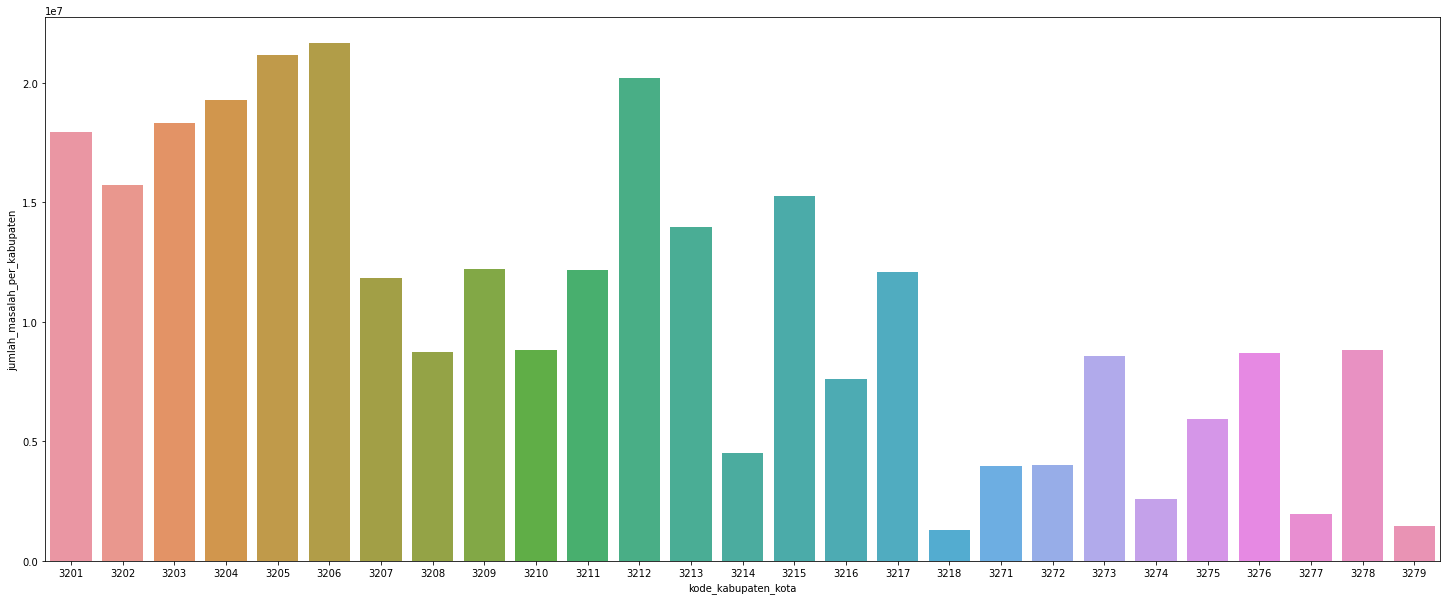

In [31]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.barplot(ax=ax, y="jumlah_masalah_per_kabupaten", x="kode_kabupaten_kota", data=df)

Dilihat dari banyaknya jumlah kasus masalah kesejahteraan sosial, Kabupten Tasikmalaya adalah kabupaten/kota yang menempati peringkat pertama, dilanjutkan oleh Kabupaten Garut di peringkat kedua, dan Kabupaten Indramayu diperingkat ketiga.

selain itu, Terjadi perbedaan yang sangat signifikan antara kabupaten yang memiliki jumlah kasus tertinggi dengan kabupaten yang memiliki jumlah kasus terendah.

## Penambahan dan Penurunan Jumlah Masalah Kesejahteraan Sosial di Kabupaten/Kota 

In [32]:
df['jumlah_masalah_Kabupaten_pertahun'] = df.apply(lambda row: df[(df.kode_kabupaten_kota == row.kode_kabupaten_kota) & (df.tahun == row.tahun)].jumlah.sum() if row.jumlah > -1 else 0, axis=1)

<AxesSubplot:xlabel='tahun', ylabel='jumlah_masalah_Kabupaten_pertahun'>

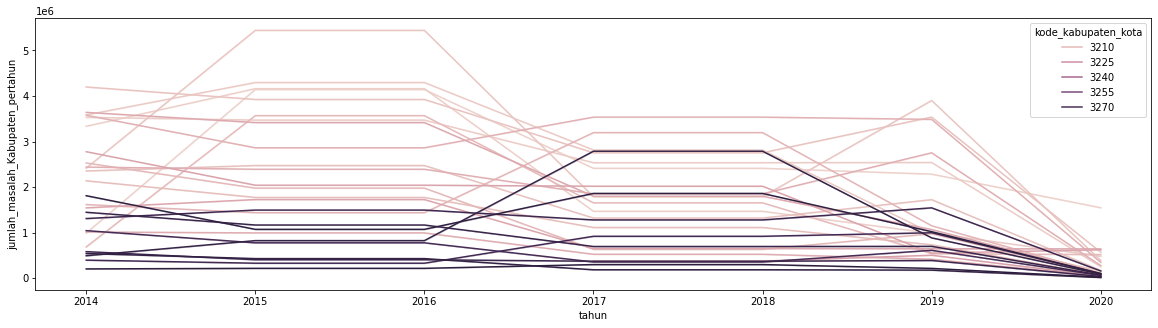

In [33]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(ax=ax, y="jumlah_masalah_Kabupaten_pertahun", x="tahun", hue="kode_kabupaten_kota", data=df)

Dilihat dari data diatas, hampir sebagian besar data jumlah penduduk yang memiliki masalah bersifat fluktuatif dari tahun ke tahun. sementara itu, pada tahun 2020, hampir semua data tersebut menurun dibandingkan data pada tahun-tahun sebelumnya

### Hubungan Antara Jumlah Kemunculan sebuah kabupaten/kota dan Jumlah Penduduk yang memiliki Masalah Kesejahteraan Sosial

<AxesSubplot:xlabel='kode_kabupaten_kota', ylabel='jumlah_masalah_per_kabupaten'>

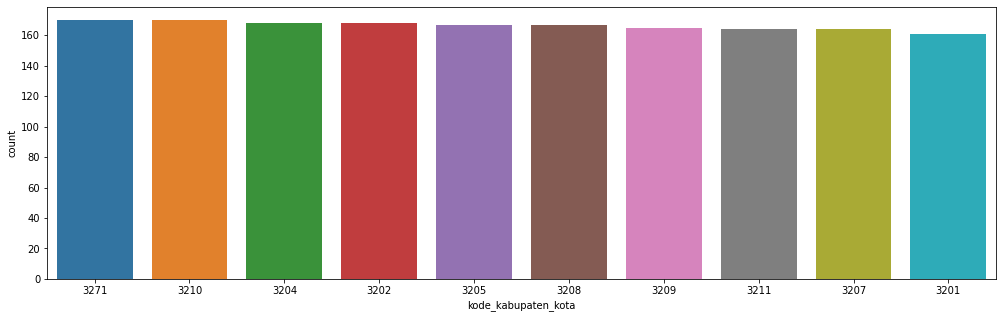

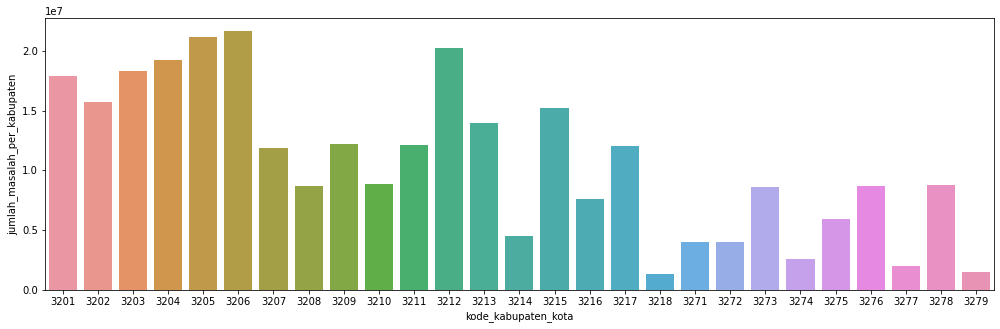

In [34]:
fig, ax = plt.subplots(figsize=(17, 5))
sns.countplot(ax=ax, x="kode_kabupaten_kota", data=df, order=df.kode_kabupaten_kota.value_counts().iloc[:10].index)

fig, ax = plt.subplots(figsize=(17, 5))
sns.barplot(ax=ax, x="kode_kabupaten_kota", y="jumlah_masalah_per_kabupaten", data=df)

Dilihat dari perbandingan antara jumlah kasus yang muncul dengan jumlah kasus, terdapat hubungan antara banyaknya kasus muncul dengan jumlah kasus di sebuah kabupaten/kota. 6 dari 10 kabupaten/kota dengan kemunculan kasus tertinggi juga menjadi kabupaten/kota yang memiliki jumlah kasus tertinggi. Dengan perbandingan 60% tersebut, bisa disimpulkan bahwa banyaknya kemunculan kasus mempengaruhi jumlah kasus di sebuah kabupaten/kota.

## ==================================================

### Hubungan Antara Jumlah Penduduk dan Jumlah Penduduk yang Memiliki Masalah Sosial Sejak 2018

Sumber Data : https://jabar.bps.go.id/indicator/12/133/1/jumlah-penduduk-menurut-kabupaten-kota.html

In [35]:
df2 = pd.read_csv("Jumlah Penduduk Menurut Kabupaten_Kota.csv")

In [36]:
df2.rename(columns={'Jumlah Penduduk Menurut Kabupaten/Kota (Jiwa)': 'tahun_2018', 'Unnamed: 2': 'tahun_2019', 'Unnamed: 3' : 'tahun_2020', "Wilayah Jawa Barat" : 'kode_kabupaten_kota'}, inplace=True)

In [37]:
df2

,kode_kabupaten_kota,tahun_2018,tahun_2019,tahun_2020
0,NaN,2018.0,2019.0,2020.0
1,Provinsi Jawa Barat,48683861.0,49316712.0,49935858.0
2,Bogor,5840907.0,5965410.0,6088233.0
3,Sukabumi,2460693.0,2466272.0,2470219.0
4,Cianjur,2260620.0,2263072.0,2264328.0
5,Bandung,3717291.0,3775279.0,3831505.0
6,Garut,2606399.0,2622425.0,2636637.0
7,Tasikmalaya,1751295.0,1754128.0,1755710.0
8,Ciamis,1188629.0,1195176.0,1201685.0
9,Kuningan,1074497.0,1080804.0,1087105.0


In [38]:
df2.drop([0,1,29,30,31,32], inplace=True)

Dilakukan penghapusan data yang tidak diperlukan, yaitu pada index 0, 1, 29, 30, 31, 32.

In [39]:
kode = 3201
for index, row in df2.iterrows():
    df2.loc[index,"kode_kabupaten_kota"] = kode
    if (kode == 3218):
        kode = 3270
    kode += 1

Algoritma di atas adalah algoritma untuk mengubah nama kota dan kabupaten menjadi kode yang sesuai dengan dataframe pertama. Ini digunakan untuk menyederhanakan proses merge data.

In [40]:
df2

,kode_kabupaten_kota,tahun_2018,tahun_2019,tahun_2020
2,3201,5840907.0,5965410.0,6088233.0
3,3202,2460693.0,2466272.0,2470219.0
4,3203,2260620.0,2263072.0,2264328.0
5,3204,3717291.0,3775279.0,3831505.0
6,3205,2606399.0,2622425.0,2636637.0
7,3206,1751295.0,1754128.0,1755710.0
8,3207,1188629.0,1195176.0,1201685.0
9,3208,1074497.0,1080804.0,1087105.0
10,3209,2176213.0,2192903.0,2209633.0
11,3210,1199300.0,1205034.0,1210709.0


In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 2 to 28
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   kode_kabupaten_kota  27 non-null     object 
 1   tahun_2018           27 non-null     float64
 2   tahun_2019           27 non-null     float64
 3   tahun_2020           27 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.1+ KB


In [42]:
df2["kode_kabupaten_kota"] = df2["kode_kabupaten_kota"].astype("int64")

Menyamakan tipe data pada kode_kabupaten_kota df2 dengan kode_kabupaten_kota df, yaitu int64.

In [43]:
df_agg = df.copy()

In [44]:
df_agg = df_agg.drop(['masalah_kesejahteraan_sosial', 'jumlah'],axis=1)

Membuat dataframe baru untuk dijadikan penyimpanan hasil merge dan menghapus atribut yang tidak digunakan dalam proses mencari Hubungan Antara Jumlah Penduduk dan Jumlah Penduduk yang Memiliki Masalah Sosial.

In [45]:
df_agg.drop(df_agg[(df_agg.tahun < 2018)].index, inplace = True)

In [46]:
df_agg = pd.merge(df_agg, df2, how='left',on=['kode_kabupaten_kota'])

In [47]:
df_agg

,kode_kabupaten_kota,tahun,jumlah_masalah_per_kabupaten,jumlah_masalah_Kabupaten_pertahun,tahun_2018,tahun_2019,tahun_2020
0,3201,2018,1.793070e+07,2.412904e+06,5840907.0,5965410.0,6088233.0
1,3201,2018,1.793070e+07,2.412904e+06,5840907.0,5965410.0,6088233.0
2,3201,2018,1.793070e+07,2.412904e+06,5840907.0,5965410.0,6088233.0
3,3201,2018,1.793070e+07,2.412904e+06,5840907.0,5965410.0,6088233.0
4,3201,2018,1.793070e+07,2.412904e+06,5840907.0,5965410.0,6088233.0
...,...,...,...,...,...,...,...
1954,3279,2020,1.479861e+06,2.206743e+04,182819.0,183110.0,183299.0
1955,3279,2020,1.479861e+06,2.206743e+04,182819.0,183110.0,183299.0
1956,3279,2020,1.479861e+06,2.206743e+04,182819.0,183110.0,183299.0
1957,3279,2020,1.479861e+06,2.206743e+04,182819.0,183110.0,183299.0


Tampilan dataframe setelah di-merge.

<AxesSubplot:xlabel='tahun_2020', ylabel='jumlah_masalah_Kabupaten_pertahun'>

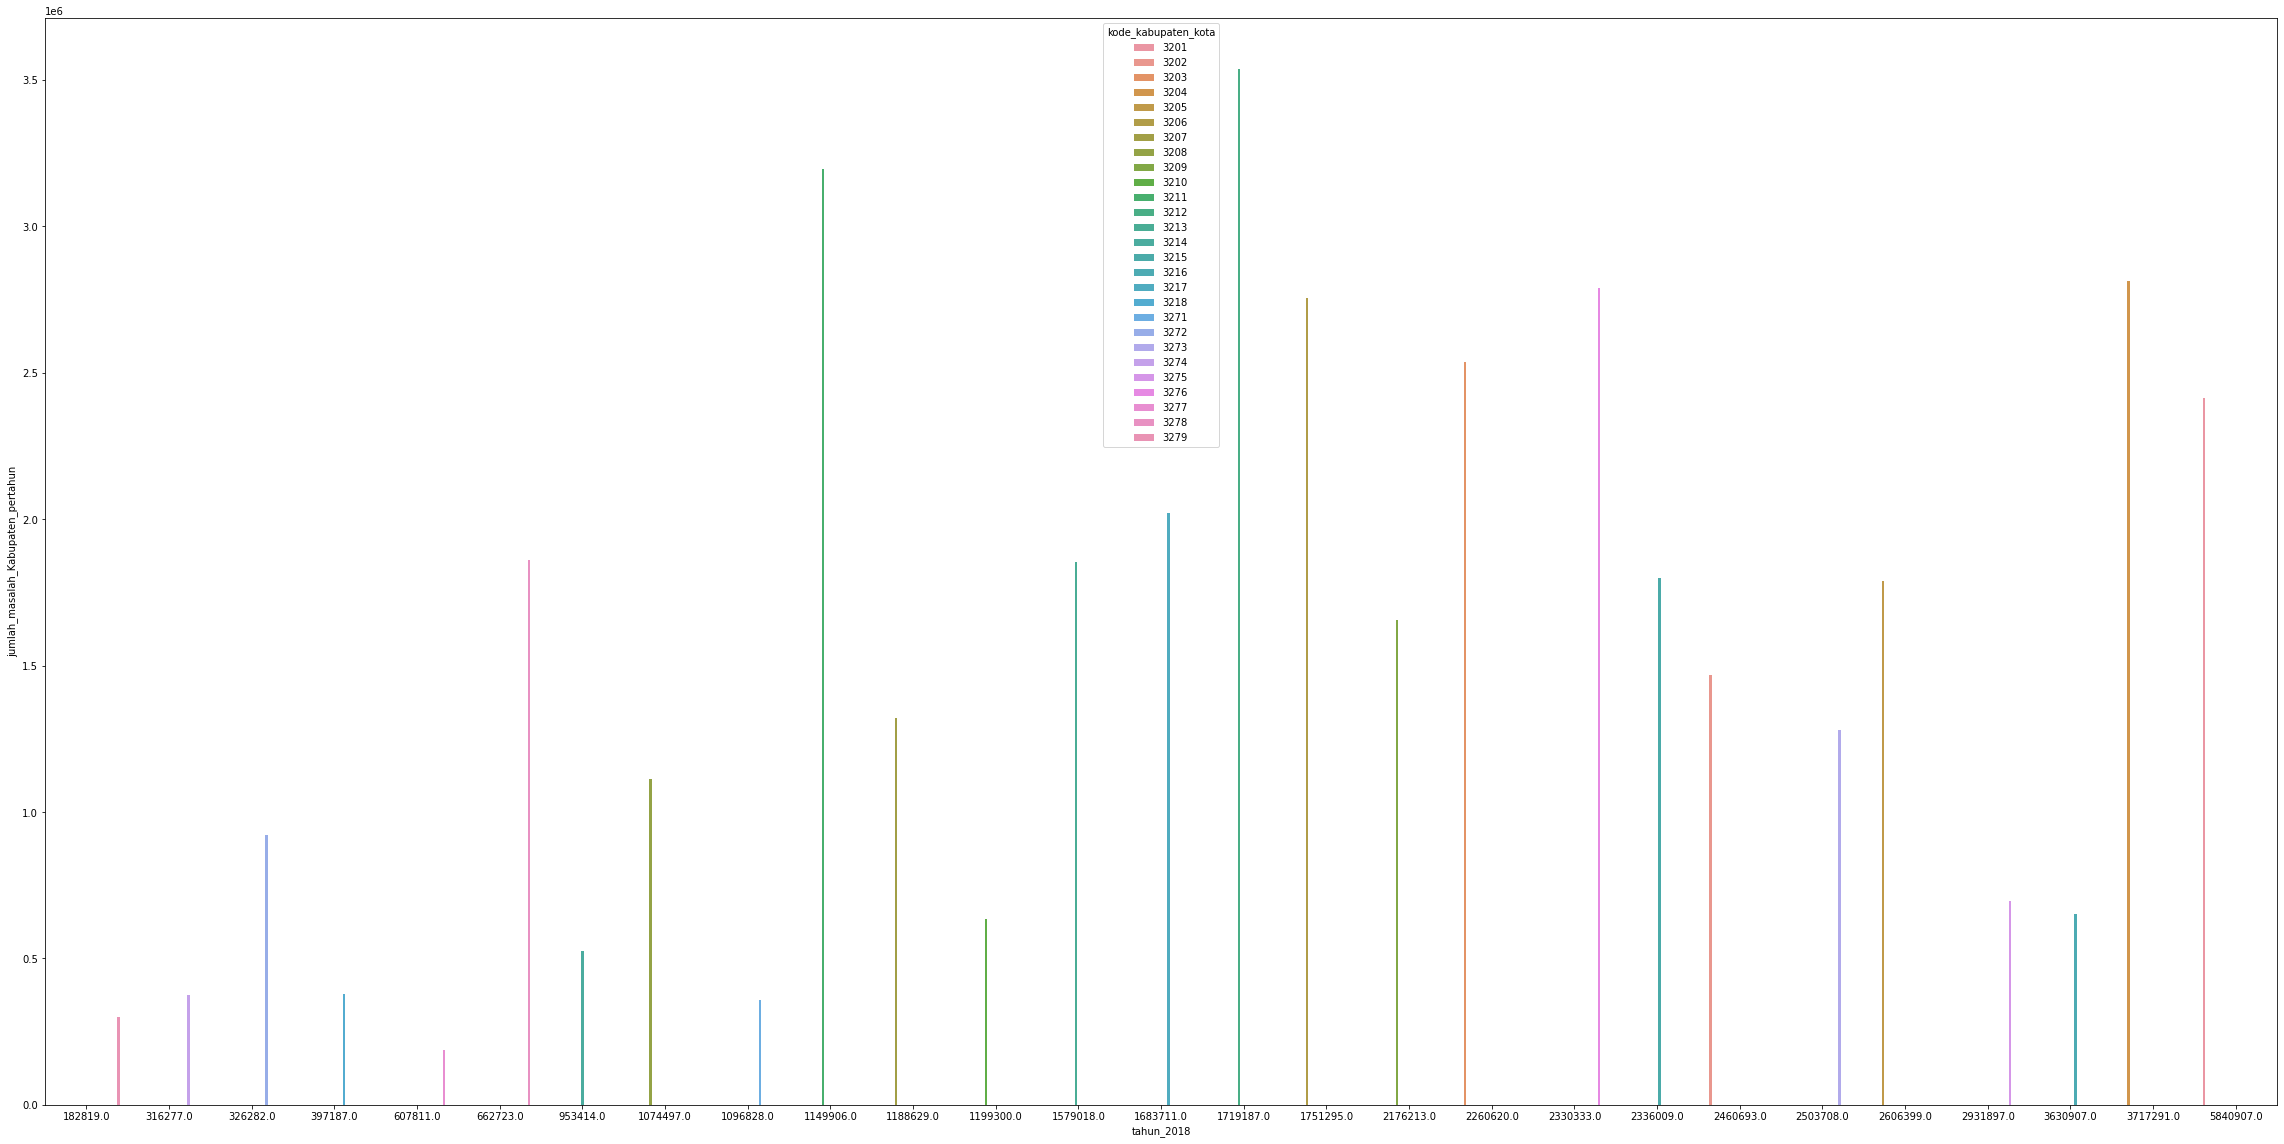

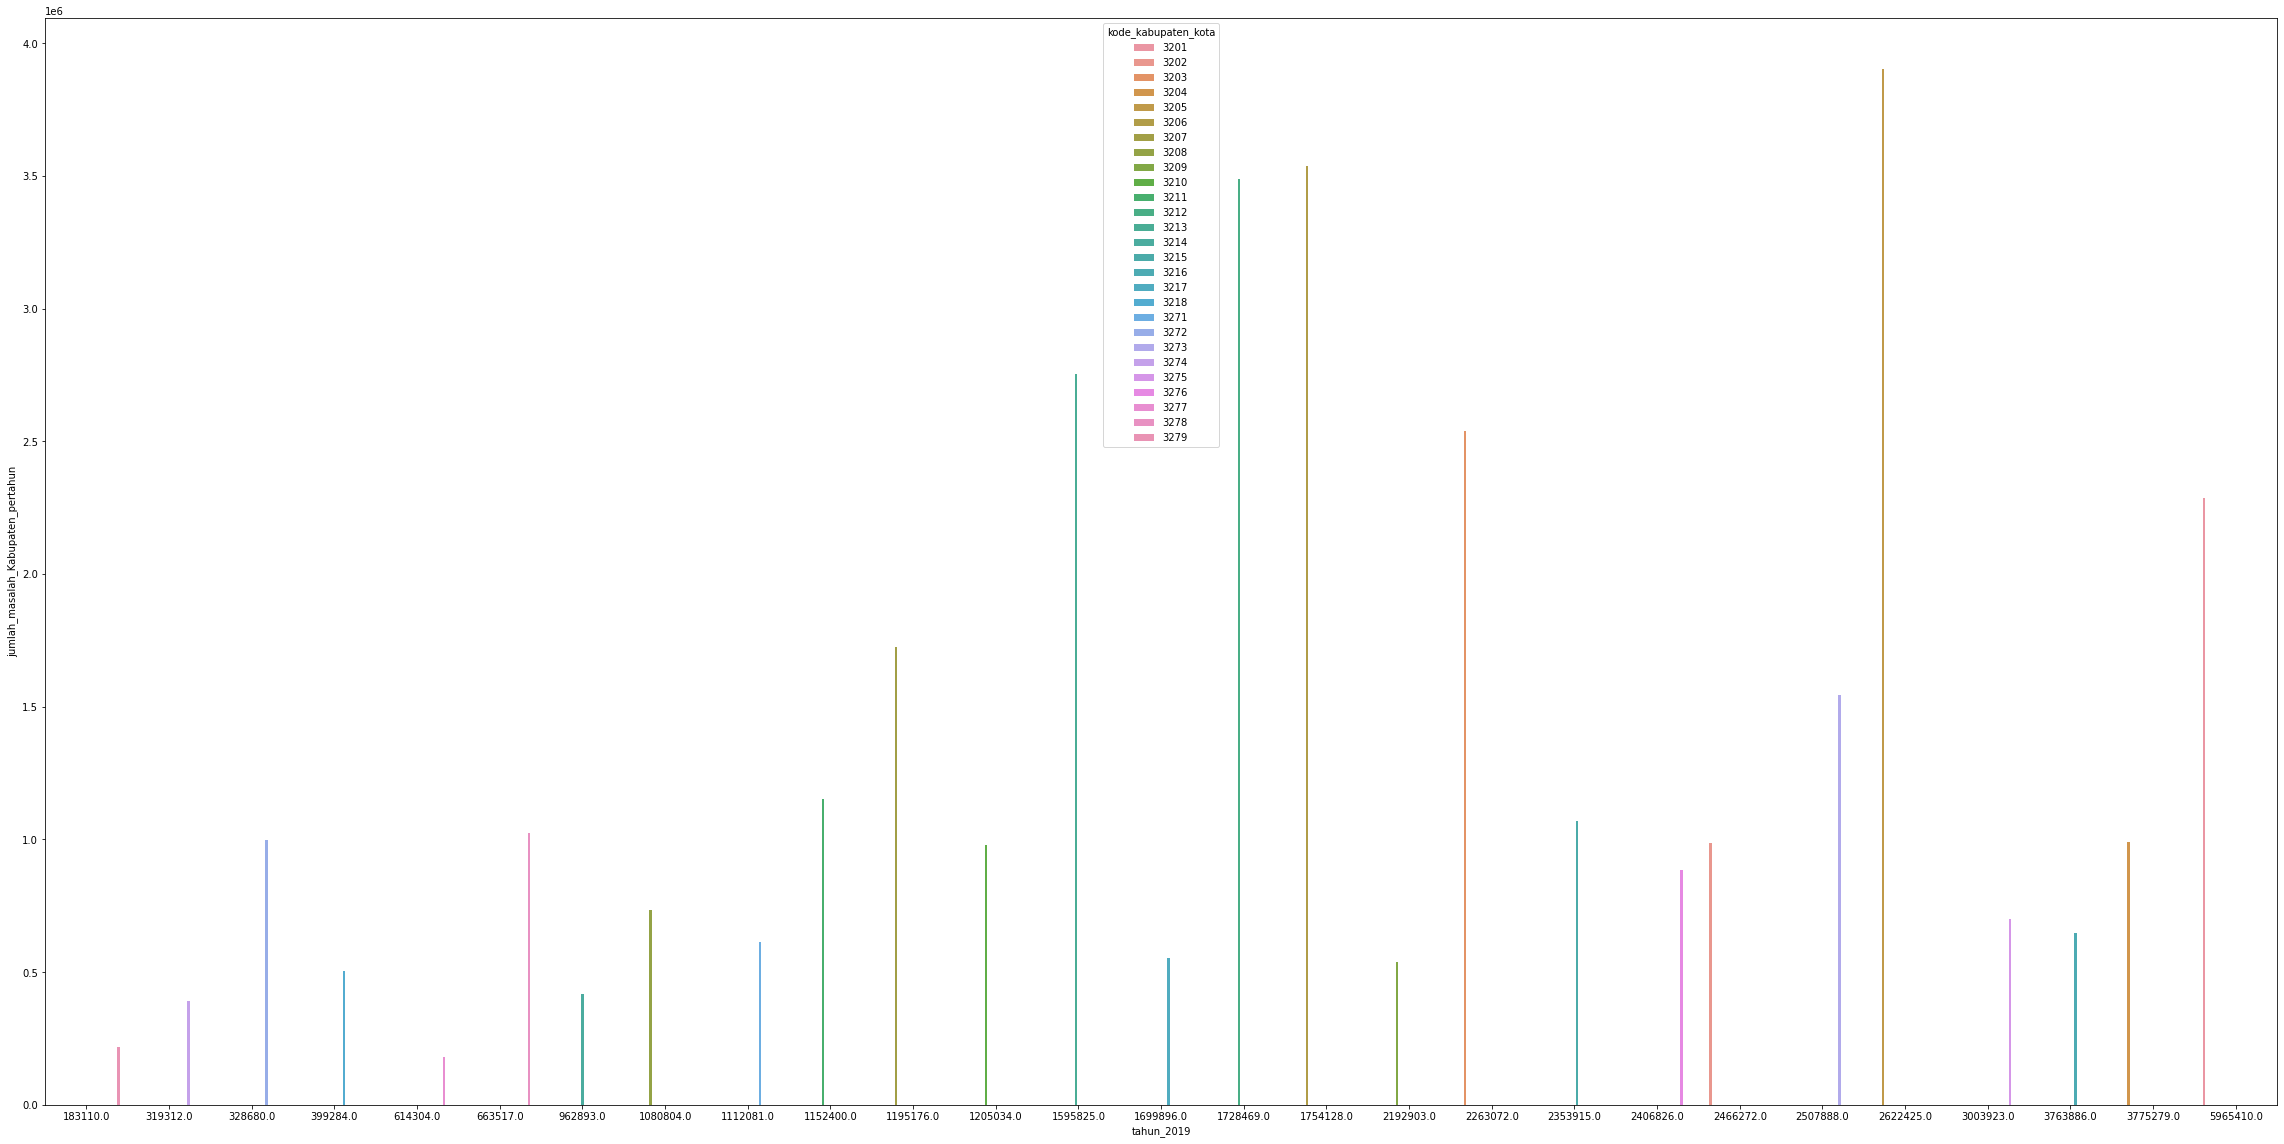

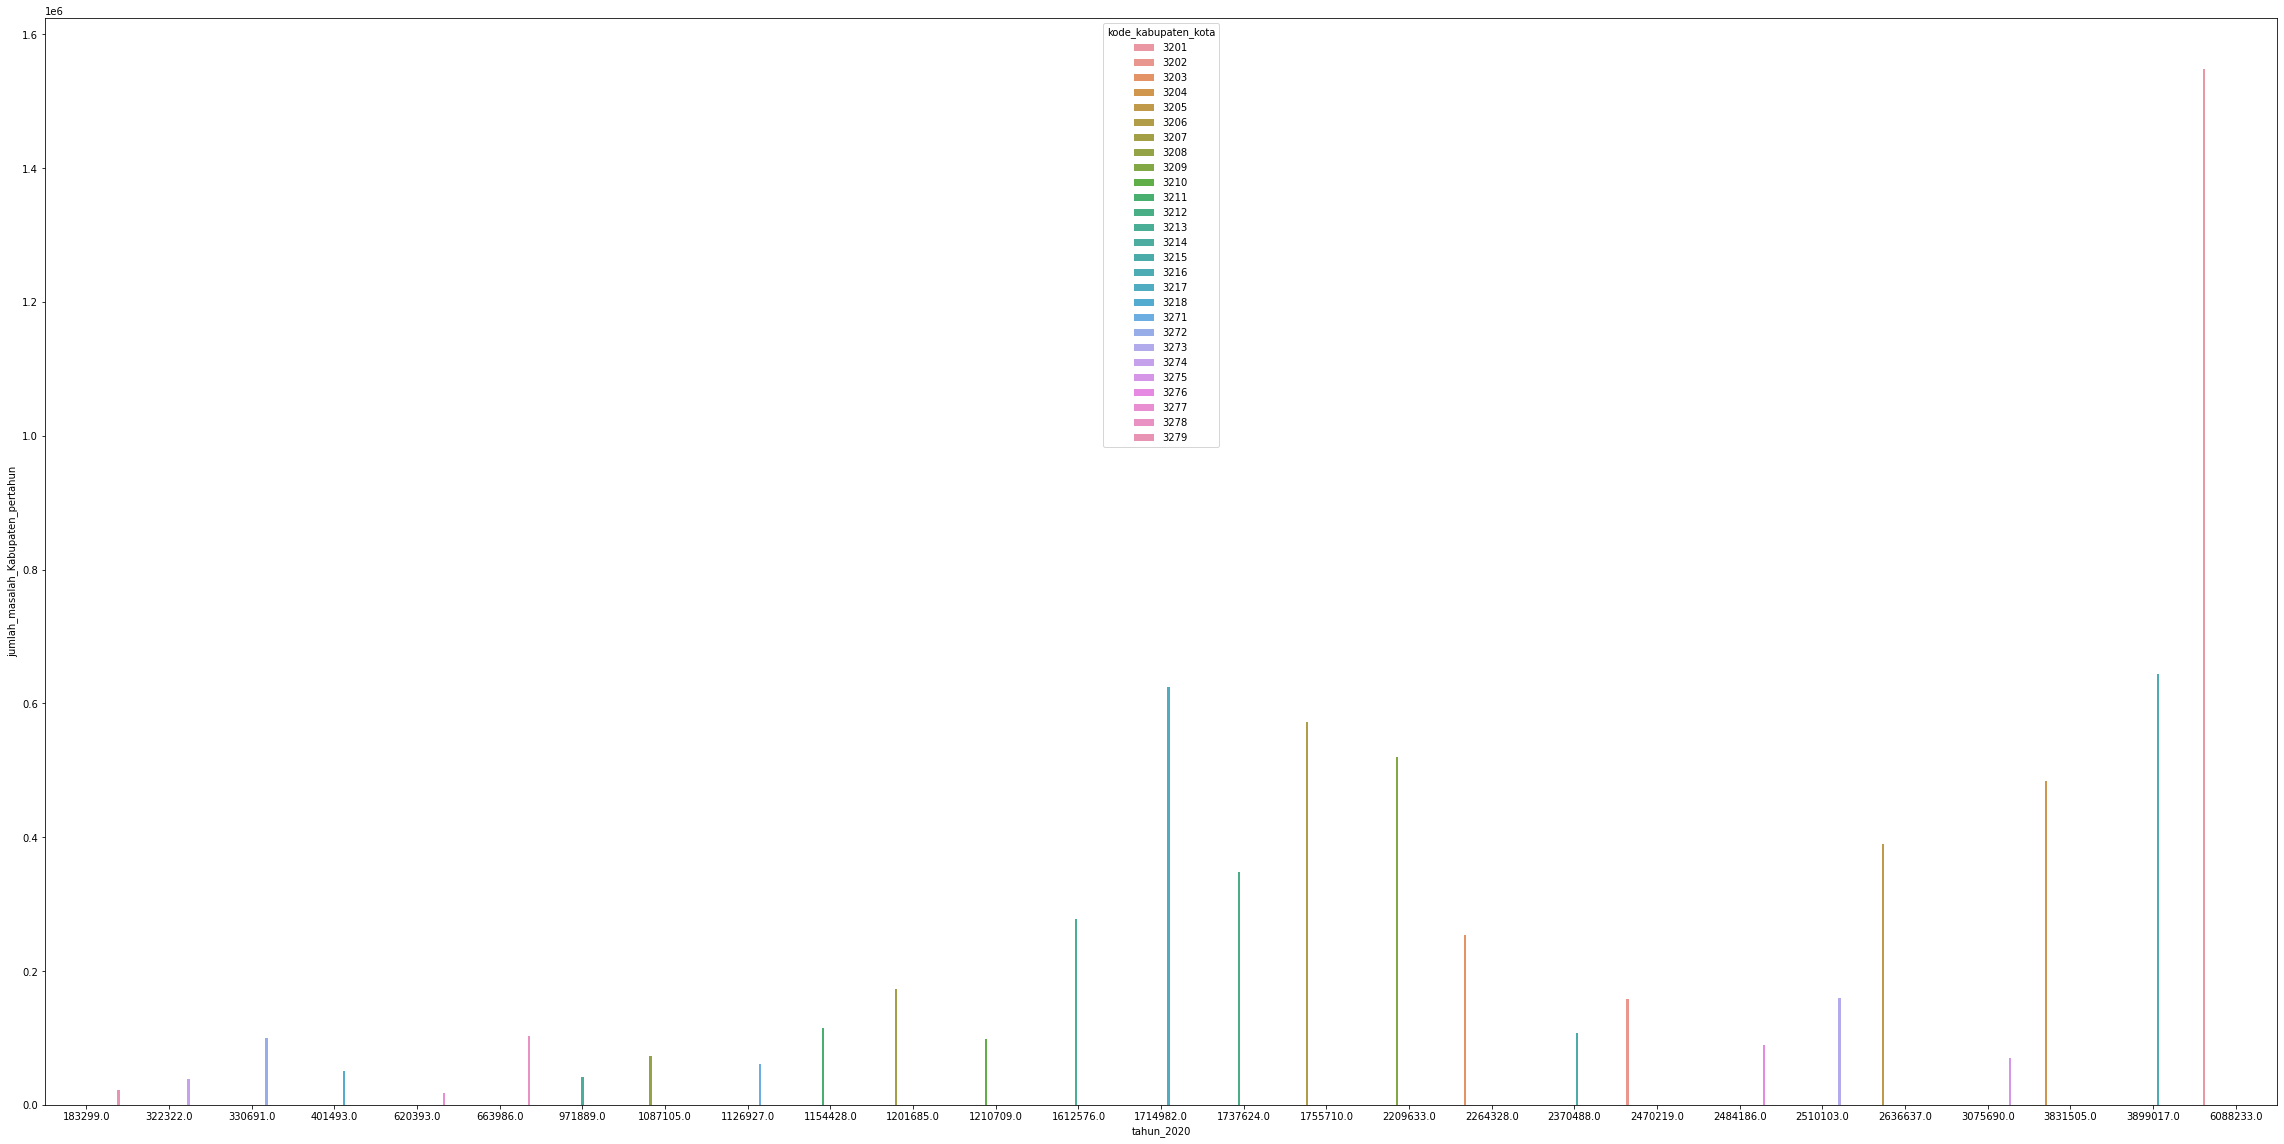

In [48]:
fig, ax = plt.subplots(figsize=(40, 20))
sns.barplot(ax=ax, y="jumlah_masalah_Kabupaten_pertahun", x="tahun_2018", hue="kode_kabupaten_kota", data=df_agg[df_agg.tahun == 2018])

fig, ax = plt.subplots(figsize=(40, 20))
sns.barplot(ax=ax, y="jumlah_masalah_Kabupaten_pertahun", x="tahun_2019", hue="kode_kabupaten_kota", data=df_agg[df_agg.tahun == 2019])

fig, ax = plt.subplots(figsize=(40, 20))
sns.barplot(ax=ax, y="jumlah_masalah_Kabupaten_pertahun", x="tahun_2020", hue="kode_kabupaten_kota", data=df_agg[df_agg.tahun == 2020])

Dilihat dari ketiga data dari tiga tahun terakhir, tidak ada hubungan linear antara tingginya jumlah penduduk di suatu kabupaten/kota dengan tingginya jumlah masalah di suatu kabupaten/kota. tingginya jumlah penduduk tidak selalu mengakibatkan tingginya jumlah masalah sosial di suatu kabupaten/kota.

Dari tahun 2014 sampai tahun 2021, terdapat 5 kasus yang merupakan kasus dengan jumlah kemunculan tertinggi di semua kabupaten. Kelima Kasus tersebut muncul sebanyak 186 kali. Karena Jawa Barat memiliki jumlah kabupaten dan kota sebanyak 27, maka dapat disimpulkan bahwa tidak ada kasus yang selalu muncul setiap tahun di semua kabupaten atau kota di Jawa Barat.

## ==================================================

### Hubungan Antara Jumlah Penduduk Miskin dan Jumlah Penduduk yang Memiliki Maslah Sosial 

Sumber Data : https://opendata.jabarprov.go.id/id/dataset/jumlah-penduduk-miskin-berdasarkan-kabupatenkota-di-jawa-barat

In [49]:
data_pend_miskin = pd.read_csv("bps-od_16425_jumlah_penduduk_miskin_berdasarkan_kabupatenkota_data.csv")

In [50]:
data_pend_miskin

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jumlah_penduduk_miskin,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,451.30,RIBU JIWA,2002
1,2,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,362.20,RIBU JIWA,2002
2,3,32,JAWA BARAT,3203,KABUPATEN CIANJUR,368.60,RIBU JIWA,2002
3,4,32,JAWA BARAT,3204,KABUPATEN BANDUNG,543.30,RIBU JIWA,2002
4,5,32,JAWA BARAT,3205,KABUPATEN GARUT,323.70,RIBU JIWA,2002
...,...,...,...,...,...,...,...,...
508,509,32,JAWA BARAT,3275,KOTA BEKASI,134.01,RIBU JIWA,2020
509,510,32,JAWA BARAT,3276,KOTA DEPOK,60.43,RIBU JIWA,2020
510,511,32,JAWA BARAT,3277,KOTA CIMAHI,31.64,RIBU JIWA,2020
511,512,32,JAWA BARAT,3278,KOTA TASIKMALAYA,86.13,RIBU JIWA,2020


In [51]:
data_pend_miskin = data_pend_miskin.drop(['nama_provinsi','kode_provinsi', 'satuan', 'id', 'nama_kabupaten_kota'],axis=1)

In [52]:
data_pend_miskin.drop(data_pend_miskin[(data_pend_miskin.tahun < 2014)].index, inplace = True)

Menghapus atribut dan data yang tidak dibutuhkan dalam proses.

In [53]:
data_pend_miskin

,kode_kabupaten_kota,jumlah_penduduk_miskin,tahun
324,3201,479.10,2014
325,3202,213.50,2014
326,3203,256.60,2014
327,3204,266.80,2014
328,3205,315.60,2014
...,...,...,...
508,3275,134.01,2020
509,3276,60.43,2020
510,3277,31.64,2020
511,3278,86.13,2020


In [54]:
data_pend_miskin.jumlah_penduduk_miskin = data_pend_miskin.jumlah_penduduk_miskin*1000

Karena pada dataframe asli, jumlah_penduduk_miskin memiliki satuan "RIBU JIWA", maka data pada jumlah_penduduk_miskin dikalikan 1000.

In [55]:
data_pend_miskin["jumlah_penduduk_miskin"] = data_pend_miskin["jumlah_penduduk_miskin"].astype("int64")

Mengubah data tipe jumlah_penduduk_miskin menjadi int64. Sama halnya dengan proses merge sebelumnya, ini dikarenakan untuk harmonisasi data.

In [56]:
data_pend_miskin = pd.merge(data_pend_miskin, df, how='left',on=['kode_kabupaten_kota'])

In [57]:
data_pend_miskin

,kode_kabupaten_kota,jumlah_penduduk_miskin,tahun_x,masalah_kesejahteraan_sosial,jumlah,tahun_y,jumlah_masalah_per_kabupaten,jumlah_masalah_Kabupaten_pertahun
0,3201,479100,2014,BALITA TERLANTAR,9180.000000,2014,1.793070e+07,990930.000000
1,3201,479100,2014,ANAK TERLANTAR,69990.000000,2014,1.793070e+07,990930.000000
2,3201,479100,2014,ANAK NAKAL (ABH),8860.000000,2014,1.793070e+07,990930.000000
3,3201,479100,2014,ANAK JALANAN,2080.000000,2014,1.793070e+07,990930.000000
4,3201,479100,2014,WANITA RAWAN SOSIAL EKONOMI (JIWA),85370.000000,2014,1.793070e+07,990930.000000
...,...,...,...,...,...,...,...,...
29283,3279,11160,2020,PEKERJA MIGRAN BERMASALAH SOSIAL,11.428571,2020,1.479861e+06,22067.428571
29284,3279,11160,2020,KORBAN BENCANA ALAM,2.857143,2020,1.479861e+06,22067.428571
29285,3279,11160,2020,PEREMPUAN RAWAN SOSIAL EKONOMI,1174.000000,2020,1.479861e+06,22067.428571
29286,3279,11160,2020,FAKIR MISKIN/RUMAH TANGGA MISKIN,11834.000000,2020,1.479861e+06,22067.428571


Hasil merge antara data_pend_miskin dengan dataframe pertama.

In [58]:
data_pend_miskin['jumlah_pendmiskin_perkab/kot'] = data_pend_miskin.apply(lambda row: data_pend_miskin[(data_pend_miskin.kode_kabupaten_kota == row.kode_kabupaten_kota) & (data_pend_miskin.tahun_x == row.tahun_x)].jumlah_penduduk_miskin.sum() if row.jumlah > -1 else 0, axis=1)

Menghitung dan membuat atribut baru, yaitu jumlah penduduk miskin (per) kabupaten/kota

<AxesSubplot:xlabel='jumlah_pendmiskin_perkab/kot', ylabel='jumlah_masalah_Kabupaten_pertahun'>

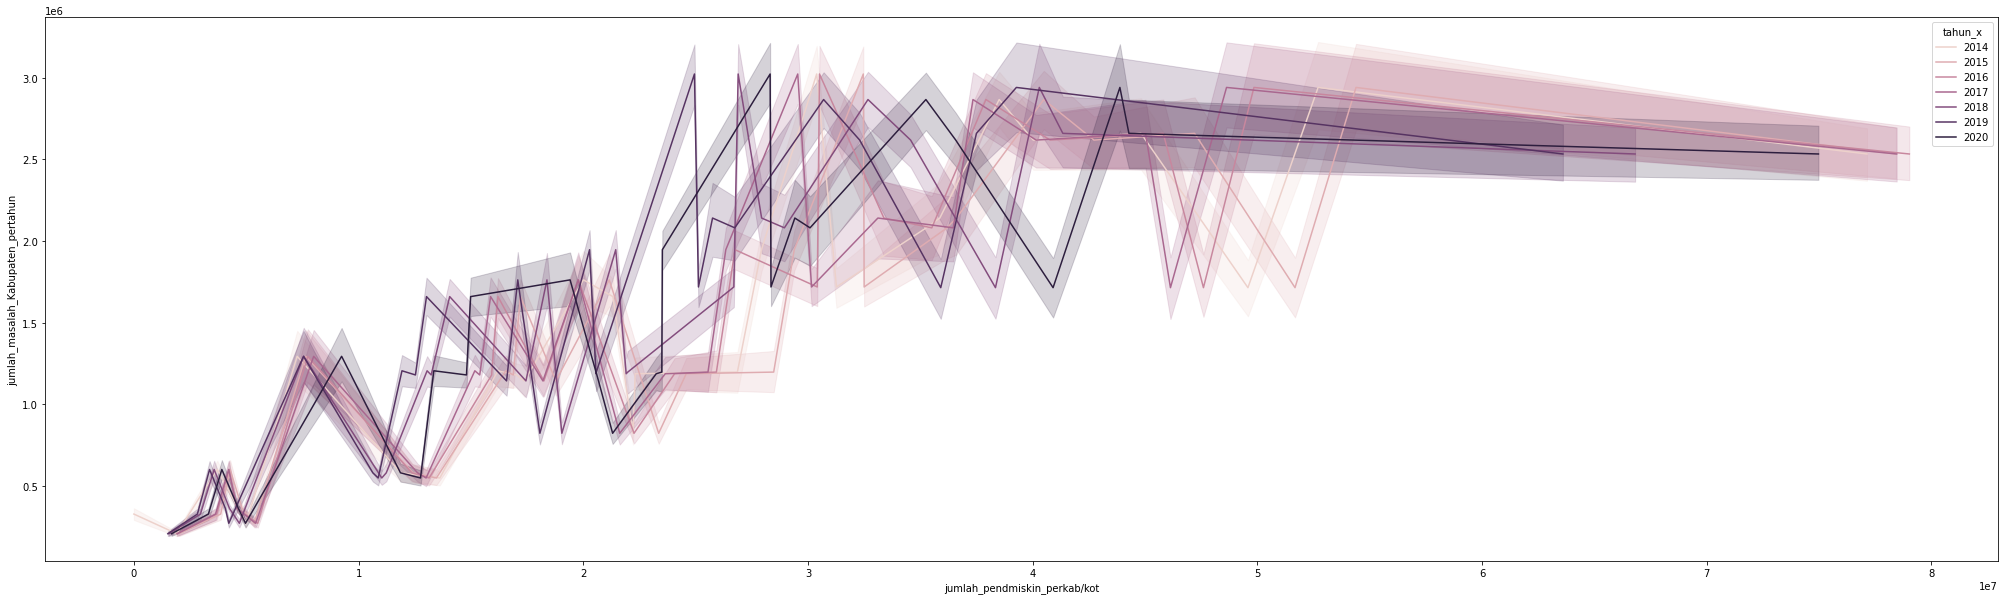

In [59]:
fig, ax = plt.subplots(figsize=(35, 10))
sns.lineplot(data=data_pend_miskin, x="jumlah_pendmiskin_perkab/kot", y="jumlah_masalah_Kabupaten_pertahun", hue="tahun_x")

Dilihat dari chart diatas, semakin tingginya jumlah penduduk miskin memberikan dampak terhadap semakin tingginya jumlah penduduk yang memiliki masalah kesejahteraan sosial. Dampak tersebut bisa dikatakan berdampak secara linear, akan tetapi tetap terjadi fluktuasi dalam penaikannya.

## ==================================================

### Masalah Kesejahteraan Sosial

<AxesSubplot:xlabel='masalah_kesejahteraan_sosial', ylabel='count'>

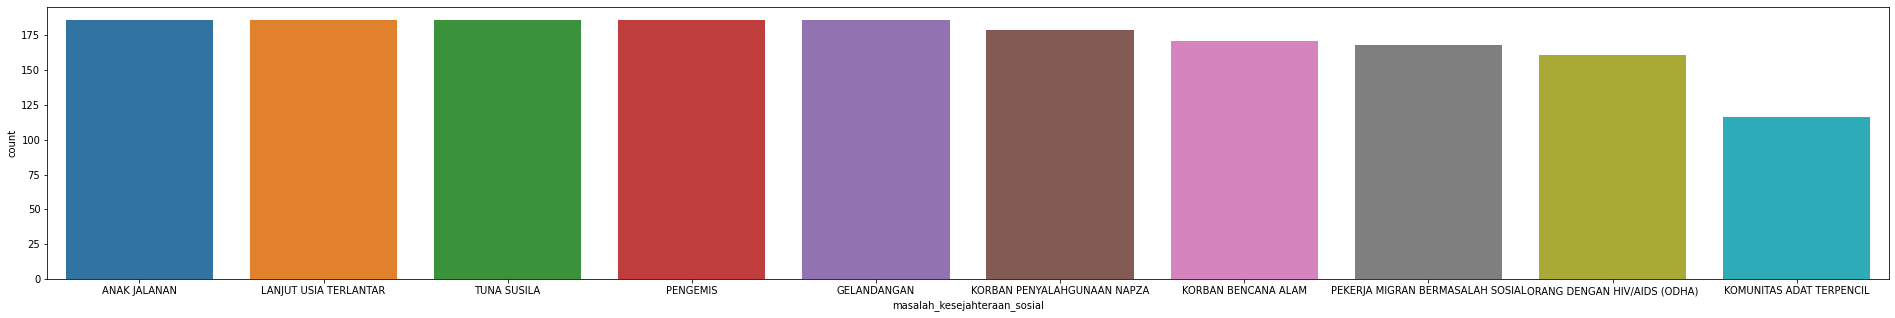

In [60]:
fig, ax = plt.subplots(figsize=(33, 5))
sns.countplot(ax=ax, x="masalah_kesejahteraan_sosial", data=df, order=df.masalah_kesejahteraan_sosial.value_counts().iloc[:10].index)

Dari tahun 2014 sampai tahun 2021, terdapat 5 kasus yang merupakan kasus dengan jumlah kemunculan tertinggi di semua kabupaten. Dalam rentang 7 tahun, Kelima Kasus tersebut muncul sebanyak 186 kali. Karena Jawa Barat memiliki jumlah kabupaten dan kota sebanyak 27, maka dapat disimpulkan bahwa tidak ada kasus yang selalu muncul setiap tahun di semua kabupaten atau kota di Jawa Barat.

## Jenis Masalah Kesejahteraan Sosial yang Paling Banyak dan Paling Sedikit Terjadi di Jawa Barat 

In [61]:
df['jumlah_masalah_setiap_jenis'] = df.apply(lambda row: df[(df.masalah_kesejahteraan_sosial == row.masalah_kesejahteraan_sosial)].jumlah.sum() if row.jumlah > -1 else 0, axis=1)

In [62]:
df.jumlah_masalah_setiap_jenis.max()

122736000.0

In [63]:
df[df.jumlah_masalah_setiap_jenis == 122736000.0][["masalah_kesejahteraan_sosial"]][:1]

,masalah_kesejahteraan_sosial
35,KELUARGA FAKIR MISKIN


In [64]:
df.jumlah_masalah_setiap_jenis.min()

11396.0

In [65]:
df[df.jumlah_masalah_setiap_jenis == 11396.0][["masalah_kesejahteraan_sosial"]][:1]

,masalah_kesejahteraan_sosial
3058,ANAK KORBAN TINDAK KEKERASAN


Dilihat dari data diatas, Masalah keluarga fakir miskin merupakan masalah kesejahteraan sosial yang paling banyak menimpa penduduk di jawa Barat dalam rentang 77 tahun terakhir dengan angka penduduk mencapai 122736000 orang. sementara itu, masalah ANAK KORBAN TINDAK KEKERASAN menjadi masalah yang paling sedikit menimpa penduduk di jawa barat. masalah tersebut terjadi sebanyak 11396 dalam rentang 7 tahun terkahir. Dengan perbedaan selisih yang sangat jauh, maka bisa disimpulkan bahwa terjadi perbedaan yang sangat signifikan antara masalah tertinggi dengan terendah